In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.shape

(768, 9)

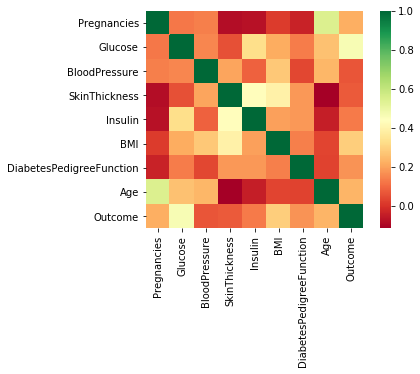

In [19]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [20]:
data = df.loc[:,['Pregnancies','Glucose','BMI','Age']]
data.describe()

,Pregnancies,Glucose,BMI,Age
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,31.992578,33.240885
std,3.369578,31.972618,7.884160,11.760232
min,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,27.300000,24.000000
50%,3.000000,117.000000,32.000000,29.000000
75%,6.000000,140.250000,36.600000,41.000000
max,17.000000,199.000000,67.100000,81.000000


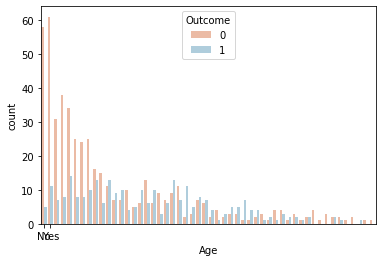

In [23]:
plt.figure()
sns.countplot(x='Age', hue='Outcome', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [8]:
#Step 2 – Exploring and preparing the data
# Create feature and target arrays
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X = preprocessing.normalize(X)
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42, stratify=y)

In [9]:
#Step 3 – Training a model on the data
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
# Print the accuracy
print(knn.score(X_test,y_test))

0.6883116883116883


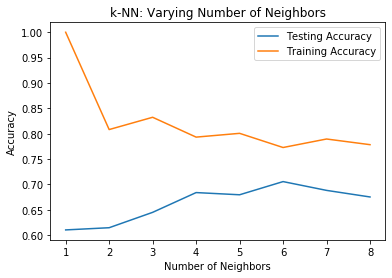

Confusion matrix is
  [[122  28]
 [ 44  37]]
Classification report is-
                precision    recall  f1-score   support

           0       0.73      0.81      0.77       150
           1       0.57      0.46      0.51        81

    accuracy                           0.69       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.68      0.69      0.68       231



In [10]:
#Step 4 – Evaluating model performance
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred))
print("Classification report is-\n ",classification_report(y_test,y_pred))

In [11]:
#STEP 5 -imporving model performance
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify=y)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))
y_pred_scaled=knn_scaled.predict(X_test)
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred_scaled))
print("Classification report is-\n ",classification_report(y_test,y_pred_scaled))

Accuracy with Scaling: 0.6493506493506493
Accuracy without Scaling: 0.6796536796536796
Confusion matrix is
  [[115  35]
 [ 46  35]]
Classification report is-
                precision    recall  f1-score   support

           0       0.71      0.77      0.74       150
           1       0.50      0.43      0.46        81

    accuracy                           0.65       231
   macro avg       0.61      0.60      0.60       231
weighted avg       0.64      0.65      0.64       231



In [12]:
CM = confusion_matrix(y_test, y_pred_scaled)

tn = CM[0][0]
fn = CM[1][0]
tp = CM[1][1]
fp = CM[0][1]
    
print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision =     {:.3f}'.format(tp/(tp+fp)))
print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

Accuracy  =     0.649
Precision =     0.500
Recall    =     0.432
F1_score  =     0.464


In [13]:
# Create a k-NN classifier with 1 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
# Print the accuracy
print(knn.score(X_test,y_test))
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred))
print("Classification report is-\n ",classification_report(y_test,y_pred))

0.6103896103896104
Confusion matrix is
  [[97 53]
 [37 44]]
Classification report is-
                precision    recall  f1-score   support

           0       0.72      0.65      0.68       150
           1       0.45      0.54      0.49        81

    accuracy                           0.61       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.63      0.61      0.62       231



In [14]:
# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
# Print the accuracy
print(knn.score(X_test,y_test))
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred))
print("Classification report is-\n ",classification_report(y_test,y_pred))

0.645021645021645
Confusion matrix is
  [[110  40]
 [ 42  39]]
Classification report is-
                precision    recall  f1-score   support

           0       0.72      0.73      0.73       150
           1       0.49      0.48      0.49        81

    accuracy                           0.65       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.64      0.65      0.64       231



In [16]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
# Print the accuracy
print(knn.score(X_test,y_test))
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred))
print("Classification report is-\n ",classification_report(y_test,y_pred))

0.7056277056277056
Confusion matrix is
  [[131  19]
 [ 49  32]]
Classification report is-
                precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.63      0.40      0.48        81

    accuracy                           0.71       231
   macro avg       0.68      0.63      0.64       231
weighted avg       0.69      0.71      0.69       231

